# Identifying and Recommending Best Restaurants

## Index
[Importing, Understanding, and Inspecting Data](#Importing,-Understanding,-and-Inspecting-Data)

[Performing EDA](#Performing-EDA:)







In [1]:
import math
import numpy as np
import pandas as pd

### Importing, Understanding, and Inspecting Data

In [2]:
# Loading the data
df = pd.read_excel("data.xlsx")

#### > Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
country_df = pd.read_excel('Country-Code.xlsx')

In [5]:
country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
# Merging the main data and country code data
df = pd.merge(df, country_df, on = 'Country Code', how  = "outer")

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [8]:
# finding the missiong values
df.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

The dataset has 1 missing value in 'Restaurant Name' and 9 missing values in 'Cuisines Respectively'.

In [9]:
# Finding the duplicate values
duplicate = df[df.duplicated()]
duplicate

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


The dataset has no duplicate observations.

In [10]:
# Finding the structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [11]:
# The dataframe has 19 columns
# some of the dataType of the columns inconsistant, and have to convert their DataTyoe accordingly.
    
#   Column                   Dtype  
#---  ------                  -------
# 0   Restaurant ID           int64    ---> Categorical (Nominal)
# 1   Restaurant Name         object   ---> Categorical (Nominal)
# 2   Country Code            int64    ---> Numerical(Descrete)
# 3   City                    object   ---> Categorical (Nominal)
# 4   Address                 object   ---> Categorical (Nominal)
# 5   Locality                object   ---> Categorical (Nominal)
# 6   Locality Verbose        object   ---> Categorical (Nominal)
# 7   Longitude               float64  ---> Numerical(Continuous)
# 8   Latitude                float64  ---> Numerical(Continuous)
# 9   Cuisines                object   ---> Categorical (Nominal)
# 10  Average Cost for two    int64    ---> Numerical(Continuous)
# 11  Currency                object   ---> Categorical (Nominal)
# 12  Has Table booking       object   ---> Categorical (Nominal/Binary)
# 13  Has Online delivery     object   ---> Categorical (Nominal/Binary)
# 14  Price range             int64    ---> Categorical (Ordinal)
# 15  Aggregate rating        float64  ---> Categorical (Ordinal)
# 16  Rating color            object   ---> Categorical (Ordinal)
# 17  Rating text             object   ---> Categorical (Ordinal)
# 18  Votes                   int64    ---> Numerical(Continuous)

#### > Based on the findings from the previous questions, identify duplicates and remove them.

In [12]:
# Dropping the duplicate values
df.drop_duplicates(inplace = True)

In [13]:
# Dropping the missing values
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

# Performing EDA:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### > Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

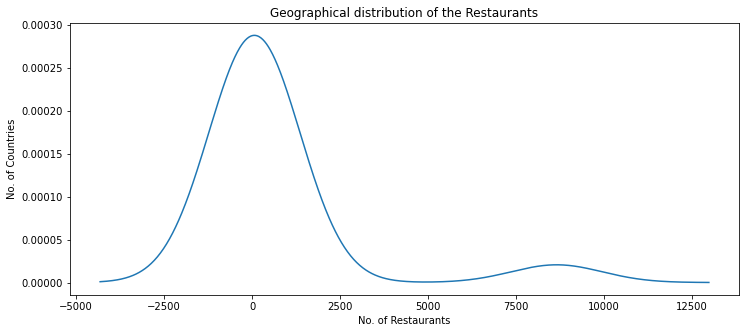

In [15]:
df['Country'].value_counts().plot(kind = 'kde').set_title("Geographical distribution of the Restaurants")
plt.xlabel('No. of Restaurants')
plt.ylabel('No. of Countries')
plt.gcf().set_size_inches(12,5)

The data has right skew.

Most of the countries are having less than 2500.

In [16]:
geo_dist = df.groupby(['Country', 'City'])['Restaurant ID'].count() # Grouping cities with No of Restaurants.
geo_dist = pd.DataFrame(geo_dist) #making the above Pandas series a dataframe as it is easy to work with dataframe.
geo_dist = geo_dist.rename(columns = {'Restaurant ID' : 'No of Restaurants'}) # changing the column name
geo_dist =  geo_dist.sort_values(by = ['No of Restaurants'],
                                 ascending = False) # ordering them in descending to find out the cities with max 
                                                    # no of Restaurants.
geo_dist

No of Restaurants
Country       City                             
India         New Delhi                    5473
              Gurgaon                      1118
              Noida                        1080
              Faridabad                     251
              Ghaziabad                      25
...                                         ...
              Panchkula                       1
Australia     Balingup                        1
Indonesia     Bandung                         1
Phillipines   Quezon City                     1
United States Winchester Bay                  1

[140 rows x 1 columns]

In [17]:
# Cities with max no of Restaurants
geo_dist.head(5)

No of Restaurants
Country City                        
India   New Delhi               5473
        Gurgaon                 1118
        Noida                   1080
        Faridabad                251
        Ghaziabad                 25

In [18]:
#cities with min No of Restaurants
geo_dist =  geo_dist.sort_values(by = ['No of Restaurants'],
                                 ascending = True)
geo_dist.head(10)

No of Restaurants
Country       City                             
United States Winchester Bay                  1
Australia     Forrest                         1
              Flaxton                         1
              East Ballina                    1
              Dicky Beach                     1
              Beechworth                      1
Phillipines   Tagaytay City                   1
South Africa  Randburg                        1
Australia     Armidale                        1
United States Mc Millan                       1

There are many cities with minimum no of Restaurant with 1, to name few 'Winchester Bay','Forrest', 'Mc millan',etc.

#### > Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [19]:
fr_dist = df.groupby('Restaurant Name')['Restaurant ID'].count() # Grouping Name/ franchise with No of Restaurants.
fr_dist = pd.DataFrame(fr_dist)# making the above Pandas series a dataframe as it is easy to work with dataframe.
fr_dist = fr_dist.rename(columns = {'Restaurant ID' : 'No of Restaurants'}) # changing the column name
fr_dist = fr_dist.sort_values(by = ['No of Restaurants'],
                                 ascending = False) # ordering them in descending to find out the franchise with max 
                                                    # no of Restaurants.
fr_dist.head(10)

,No of Restaurants
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
Keventers,34
Pizza Hut,30
Giani,29
Baskin Robbins,28


#### > Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking



In [20]:
table_booking = df.groupby('Has Table booking')['Restaurant ID'].count()
table_booking

Has Table booking
No     8383
Yes    1158
Name: Restaurant ID, dtype: int64

In [21]:
allow_booking = 1158.
not_allow_table_booking = 8383.


print(f"""No of restaurant that allow table booking are {int(allow_booking)}.
No of restaurant that do not allow table booking are {int(not_allow_table_booking)}.
The ratio between restaurant that allow table booking Vs. restaurant that do not allow table booking is {int(allow_booking // allow_booking)}:{int(not_allow_table_booking//allow_booking)}.""")

No of restaurant that allow table booking are 1158.
No of restaurant that do not allow table booking are 8383.
The ratio between restaurant that allow table booking Vs. restaurant that do not allow table booking is 1:7.


#### > Find out the percentage of restaurants providing online delivery

In [22]:
online_del = df.groupby('Has Online delivery')['Restaurant ID'].count()
online_del

Has Online delivery
No     7090
Yes    2451
Name: Restaurant ID, dtype: int64

In [23]:
online_del = 2451
no_ol_del = 7090
total_restaurant = online_del + no_ol_del
print(f"""No of restaurants that provide online delivery are {int(online_del)}.
No of restaurants that do not provide online delivery are {int(no_ol_del)}
Percentage of Restaurants providing Online Delivery is {int(online_del*100//total_restaurant)}%.""")

No of restaurants that provide online delivery are 2451.
No of restaurants that do not provide online delivery are 7090
Percentage of Restaurants providing Online Delivery is 25%.


#### > Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [24]:
del_wise_votes = df.groupby('Has Online delivery')['Votes'].sum()
del_wise_votes

Has Online delivery
No     977236
Yes    517914
Name: Votes, dtype: int64

In [25]:
del_ol = 517914
not_del_ol = 977236

print(f"""
The restaurants having Online delivery has been voted {int(del_ol)} times by customer.
The restaurants not having Online delivery has been voted {int(not_del_ol)} times by customer.
The difference in no of votes for the restaurants that deliver and the restaurants that do not deliver is {int(abs(del_ol - not_del_ol))}.
""")


The restaurants having Online delivery has been voted 517914 times by customer.
The restaurants not having Online delivery has been voted 977236 times by customer.
The difference in no of votes for the restaurants that deliver and the restaurants that do not deliver is 459322.



#### > What are the top 10 cuisines served across cities?

In [26]:
df['Cuisines'].unique()

array(['Italian, Continental', 'Asian, Indonesian, Western',
       'Sushi, Japanese', ..., 'Coffee and Tea, Desserts, Beverages',
       'Desserts, Pizza, Ice Cream', 'Chinese, Canadian'], dtype=object)

In [27]:
cuisines_df = pd.DataFrame(df['Cuisines'].str.split(',').tolist(), 
                           index = df['Restaurant ID']).stack()
# created a new DF Restaurant ID as Index.
#-------------------------------------------------------

cuisines_df = pd.DataFrame(cuisines_df)
# making it a dataframe from series.
#-------------------------------------------------------

cuisines_df = cuisines_df.reset_index([0,'Restaurant ID'])
# To do this, we will make Restaurant ID as a column (it can't be an index since the values will be duplicate)
cuisines_df

,Restaurant ID,0
0,7402935,Italian
1,7402935,Continental
2,7410290,Asian
3,7410290,Indonesian
4,7410290,Western
...,...,...
19701,16659169,Japanese
19702,16659169,Sushi
19703,16643459,Chinese
19704,16643459,Canadian


In [28]:
city_cuisine_df = pd.merge(df, cuisines_df, on = 'Restaurant ID', how = 'outer')
city_cuisine_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,0
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,Italian
1,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,Continental
2,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,Asian
3,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,Indonesian
4,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19701,16659169,Tokyo Sushi,37,Chatham-Kent,"150 Richmond St, Chatham-Kent, ON N7M2V2",Chatham-Kent,"Chatham-Kent, Chatham-Kent",-82.188438,42.397683,"Japanese, Sushi",...,Dollar($),No,No,2,3.7,Yellow,Good,176,Canada,Japanese
19702,16659169,Tokyo Sushi,37,Chatham-Kent,"150 Richmond St, Chatham-Kent, ON N7M2V2",Chatham-Kent,"Chatham-Kent, Chatham-Kent",-82.188438,42.397683,"Japanese, Sushi",...,Dollar($),No,No,2,3.7,Yellow,Good,176,Canada,Sushi
19703,16643459,Consort Restaurant,37,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",...,Dollar($),No,No,2,3.0,Orange,Average,6,Canada,Chinese
19704,16643459,Consort Restaurant,37,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",...,Dollar($),No,No,2,3.0,Orange,Average,6,Canada,Canadian


In [29]:
# Dropping the 'Cuisine' col. and Renameing the newly created cuisines col.
city_cuisine_df.drop(['Cuisines'], axis = 1, inplace = True)
city_cuisine_df.rename(columns = {0 : 'Cuisines'}, inplace = True)

In [30]:
#Removing the space
city_cuisine_df['Cuisines'] = city_cuisine_df['Cuisines'].str.replace(' ', '')
# removing the might have created some duplicates, so dropping the duplicates
city_cuisine_df.drop_duplicates(inplace = True)

In [31]:
top_cuisine = city_cuisine_df.groupby('Cuisines')['Cuisines'].count() #grouping by cuisine name and their count
top_cuisine = pd.DataFrame(top_cuisine) # Making it a pandas dataframe since 1 col is series in pandas
top_cuisine = top_cuisine.rename(columns= {top_cuisine.columns[0] : 'No. Cuisine'}) # changing the col name since the
                                                                                # index and col has same name 'Cuisine'
top_cuisine = top_cuisine.sort_values(by = ['No. Cuisine'], 
                            ascending = False)                        # sorting from High to low value
top_cuisine.head(10) # finding the top 10 values

,No. Cuisine
Cuisines,
NorthIndian,3959
Chinese,2733
FastFood,1986
Mughlai,994
Italian,763
Bakery,744
Continental,735
Cafe,703
Desserts,653


Following are the top 10 Cuisines served.
1. North Indian
2. Chinese 
3. Fast Food 
4. Mughlai
5. Italian
6. Bakery
7. Continental
8. Cafe 
9. Desserts 
10. SouthIndian


#### > What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

In [32]:
count_cuisine = city_cuisine_df.groupby(['Restaurant ID', 'Restaurant Name'])['Cuisines'].count()
count_cuisine = pd.DataFrame(count_cuisine)
count_cuisine = count_cuisine.rename(columns = {count_cuisine.columns[0]: 'No of cuisines'})
count_cuisine = count_cuisine.sort_values(by = ['No of cuisines'], 
                            ascending = False )
count_cuisine.head(5) # Max No of Cuisines that Restaurants serve.

,,No of cuisines
Restaurant ID,Restaurant Name,
18370704,Marble,8
307566,Bikanervala,8
18279982,Indian Summer Cafe,8
18446491,Bikanervala,8
18381220,Healthy Food Station,8


In [33]:
count_cuisine.tail(5) # Min no of Cuisines that a restaurant serves. 

,,No of cuisines
Restaurant ID,Restaurant Name,
18285723,Chai Thela,1
302425,Annapoorna,1
18285728,Qureshi Kabab,1
302424,Janta Eating House,1
18500652,Mahek By Greenz,1


Maximum no. of cuisines that a restaurant serves is 8 and restaurants like Marble, Bikanerwala, Indian Summer cafe,etc serve.
Minimum no of cuisines that a restaurant serves is 1, restaurants like Chai Thela, Annapurna, Qureshi Kabab,etc serve.

In [34]:
count_cuisine = city_cuisine_df.groupby(['City', 'Cuisines'])['Cuisines'].count()
count_cuisine = pd.DataFrame(count_cuisine)
count_cuisine = count_cuisine.rename(columns = {count_cuisine.columns[0]: 'No of cuisines'})
count_cuisine = count_cuisine.sort_values(by = ['No of cuisines'], 
                            ascending = False )
count_cuisine

No of cuisines
City      Cuisines                     
New Delhi NorthIndian              2425
          Chinese                  1638
          FastFood                 1304
          Mughlai                   628
Noida     NorthIndian               532
...                                 ...
Davenport Asian                       1
Dalton    Thai                        1
          Tex-Mex                     1
New Delhi CuisineVaries               1
Abu Dhabi Afghani                     1

[1850 rows x 1 columns]

North Indian, Chinese, Mughalai is the most served cuisine served across the cities.

#### > What is the distribution cost across the restaurants?

In [35]:
city_cuisine_df['Average Cost for two'].describe()

count     19701.000000
mean       1313.932034
std       16716.634585
min           0.000000
25%         300.000000
50%         500.000000
75%         800.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

Here mean is 1313. and 50 %ile is 500.

we can conclude that there are outliers present.

we shall plot a Boxplot to see the further distribution.

Maximum Avg cost is 800000.

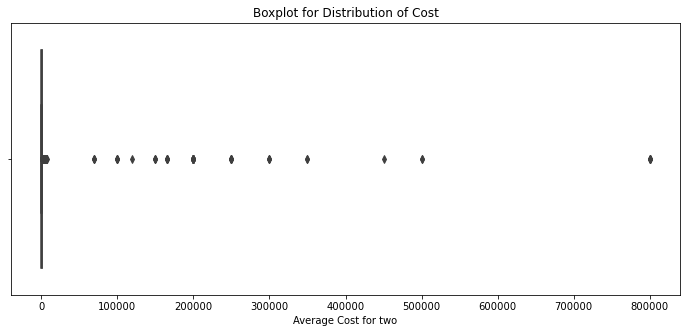

In [36]:
sns.boxplot(city_cuisine_df['Average Cost for two']).set_title("Boxplot for Distribution of Cost")
plt.gcf().set_size_inches(12,5)

As we saw in cell above, Maximum Avg cost is 800000.
Most of the observation are 50000, clearly the data has outliers.

#### > How ratings are distributed among the various factors?

For seeing distribution of Ratings, i decided to plot countplot.

In [37]:
# The ratings have multiple values with different decimal numbers, so rounding will reduce the categories.
city_cuisine_df['Aggregate rating'] = round(city_cuisine_df['Aggregate rating'])

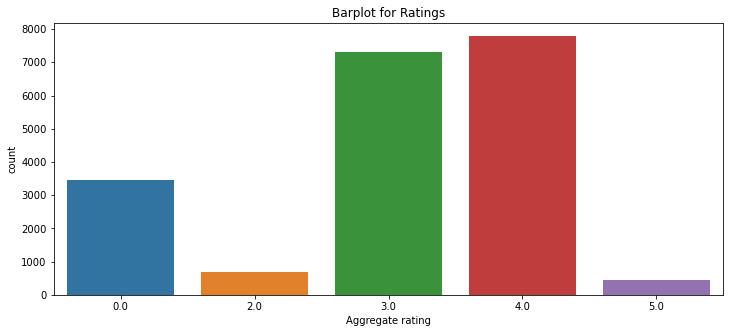

In [38]:
sns.countplot(city_cuisine_df['Aggregate rating']).set_title('Barplot for Ratings')
plt.gcf().set_size_inches(12,5)

More than 7000 restaurants are rated as 3 and 4.

less than 1000 restaurants are rated as 2 and 5,

More than 3000 restaurants are rated as 0.

In [39]:
city_cuisine_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country', 'Cuisines'],
      dtype='object')

#### > Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.

In [40]:
# making the dataset having no of cuisine
count_cuisine = city_cuisine_df.groupby(['Restaurant ID', 'Restaurant Name'])['Cuisines'].count()
count_cuisine = pd.DataFrame(count_cuisine)
count_cuisine = count_cuisine.rename(columns = {count_cuisine.columns[0]: 'No of cuisines'})
count_cuisine = count_cuisine.sort_values(by = ['No of cuisines'], 
                            ascending = False )
count_cuisine = count_cuisine.reset_index()

In [41]:
# merging above created dataset with maindataset for further analysis
city_cuisine_df = pd.merge(city_cuisine_df, count_cuisine, on = 'Restaurant ID', how = 'outer')

In [42]:
city_cuisine_df = city_cuisine_df.drop(['Restaurant Name_y'], 
                     axis = 1) # Dropping the Restaurant name_y column to avoid heteroscadesticity
city_cuisine_df = city_cuisine_df.rename(columns = {'Restaurant Name_x' :'Restaurant Name'}) # renameing the col

In [43]:
city_cuisine_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country', 'Cuisines',
       'No of cuisines'],
      dtype='object')

In [44]:
corr_analysis_df = city_cuisine_df[['Aggregate rating',
                'Average Cost for two',
                'Has Table booking',
                'Has Online delivery',                    # Making a new dataframe for correlation analysis
                'Price range',
                'No of cuisines'
                                   ]]                       

In [45]:
corr_analysis_df['Has Table booking'] = corr_analysis_df['Has Table booking'].replace('No', 0)
corr_analysis_df['Has Table booking'] = corr_analysis_df['Has Table booking'].replace('Yes', 1)
corr_analysis_df['Has Online delivery'] = corr_analysis_df['Has Online delivery'].replace('No', 0)
corr_analysis_df['Has Online delivery'] = corr_analysis_df['Has Online delivery'].replace('Yes', 1)

<ipython-input-45-0dfbb712cd33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_analysis_df['Has Table booking'] = corr_analysis_df['Has Table booking'].replace('No', 0)
<ipython-input-45-0dfbb712cd33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_analysis_df['Has Table booking'] = corr_analysis_df['Has Table booking'].replace('Yes', 1)
<ipython-input-45-0dfbb712cd33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [46]:
corr_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 19700
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aggregate rating      19701 non-null  float64
 1   Average Cost for two  19701 non-null  int64  
 2   Has Table booking     19701 non-null  int64  
 3   Has Online delivery   19701 non-null  int64  
 4   Price range           19701 non-null  int64  
 5   No of cuisines        19701 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [51]:
corr_analysis_df.corr(method = 'pearson').head(1)

,Aggregate rating,Average Cost for two,Has Table booking,Has Online delivery,Price range,No of cuisines
Aggregate rating,1.0,0.052323,0.194957,0.205227,0.433909,0.268848


Ratings has very low correlation with the factors like Avg cost, Table booking, online delivery and No of cuisine.

These factors does not show any significant effect on Ratings of a Restaurant.

In [52]:
# Saving to excel file for tableau analysis
city_cuisine_df.to_excel('Restaurant_data.xlsx') 

![The End](https://drive.google.com/uc?export=view&id=1bjUl97fMuwiJxamBtdiQxxZPIwBplV8F)